# Exploratory Data Analysis Of IMDB Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('IMDB_Movie_Data.csv', parse_dates = [0])

In [3]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
df.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


### Understanding Dataset

In [5]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 1000 rows and 12 columns


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1000.0,2012.783000,3.205962,2006.0,2010.00,2014.000,2016.000,2016.00
Runtime (Minutes),1000.0,113.172000,18.810908,66.0,100.00,111.000,123.000,191.00
Rating,1000.0,6.723200,0.945429,1.9,6.20,6.800,7.400,9.00
Votes,1000.0,169808.255000,188762.647518,61.0,36309.00,110799.000,239909.750,1791916.00
Revenue (Millions),872.0,82.956376,103.253540,0.0,13.27,47.985,113.715,936.63
Metascore,936.0,58.985043,17.194757,11.0,47.00,59.500,72.000,100.00


In [7]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   object 
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


In [9]:
df['Genre'].value_counts()

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 207, dtype: int64

### Data Cleaning
* Renaming Columns
* Changing the datatype
* Removing Duplicates
* remove irrelevant data
* fill in missing values

In [10]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [11]:
df.rename(columns = {'Runtime (Minutes)': 'Runtime', 'Revenue (Millions)':'Revenue'}, inplace = True)

In [12]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime', 'Rating', 'Votes', 'Revenue', 'Metascore'],
      dtype='object')

In [13]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [14]:
df['Revenue'] = df['Revenue'] * 1000000

In [15]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333130000.0,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126460000.0,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138120000.0,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270320000.0,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325020000.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17540000.0,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58010000.0,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [16]:
df.dtypes

Rank            object
Title           object
Genre           object
Description     object
Director        object
Actors          object
Year             int64
Runtime          int64
Rating         float64
Votes            int64
Revenue        float64
Metascore      float64
dtype: object

In [17]:
# remove duplicates
df.duplicated().sum()

0

### Missing Values

In [18]:
df['Revenue'].isnull().sum()  # the number of missing values in revenue

128

In [19]:
avg_revenue = np.round(df['Revenue'].mean())

In [20]:
avg_revenue

82956376.0

In [21]:
df['Revenue'].fillna(avg_revenue, inplace = True)

In [22]:
df['Metascore'].mean()

58.98504273504273

In [23]:
df['Metascore'].fillna(df['Metascore'].mean(), inplace = True)

## ANALYSIS

#### Display the total number of movies

In [24]:
print(f"There are {df['Title'].value_counts().sum()} movies")

There are 1000 movies


#### Display the number of movies having runtime greater than or equals to 180

In [25]:
(df['Runtime'] >= 180).sum()

5

#### In what year did we have the highest avg vote

In [58]:
np.round(df['Votes'].groupby(df['Year']).mean(),2).sort_values(ascending = False).reset_index()

,Year,Votes
0,2012,285226.09
1,2008,275505.38
2,2006,269289.95
3,2009,255780.65
4,2010,252782.32
5,2007,244331.04
6,2011,240790.30
7,2013,219049.65
8,2014,203930.22
9,2015,115726.22


Observation: The year 2012 had the highest number of votes

#### Average Voting By Year

In [27]:
avg_votes_by_year = df.groupby(df['Year']).agg(avg_votes = ('Votes', 'mean')).reset_index()

In [28]:
avg_votes_by_year

,Year,avg_votes
0,2006,269289.954545
1,2007,244331.037736
2,2008,275505.384615
3,2009,255780.647059
4,2010,252782.316667
5,2011,240790.301587
6,2012,285226.093750
7,2013,219049.648352
8,2014,203930.224490
9,2015,115726.220472


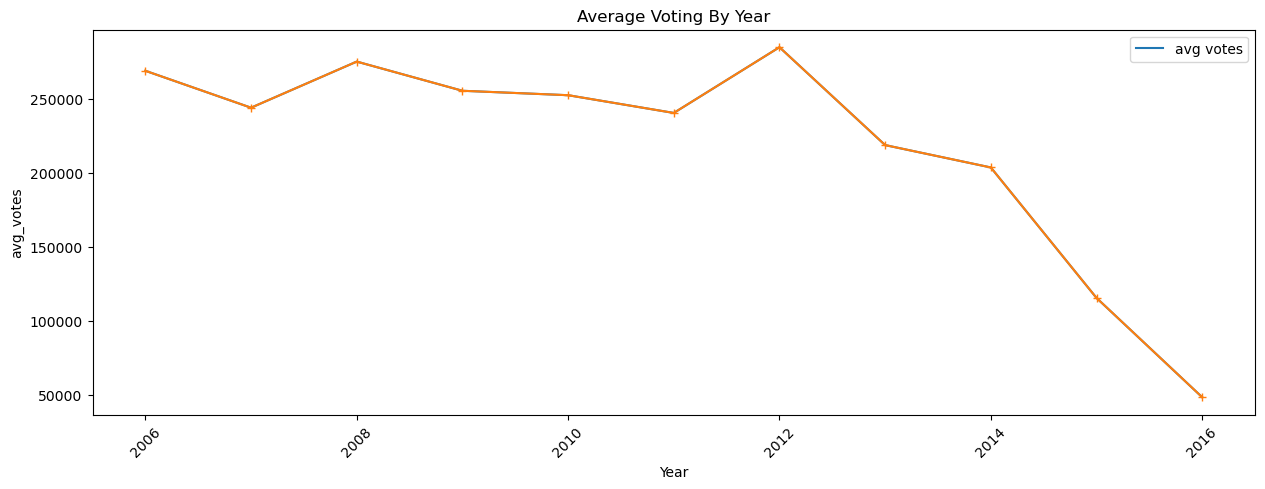

In [29]:
#visualize the average votes by year
x = avg_votes_by_year['Year']
y = avg_votes_by_year['avg_votes']

#resize
plt.figure(figsize=(15,5))


sns.lineplot(avg_votes_by_year, x=x, y=y, label = 'avg votes')

plt.xticks(rotation=45)
plt.title('Average Voting By Year') 
plt.plot(x,y, marker ='+', linestyle='-')
plt.show()



Observation: The year 2012 had the highest average number of votes while 2016 had the lowest

#### What is the number of movies produced by year

In [30]:
count_of_movie_by_year = df.groupby('Year').agg(number_of_movies = ('Title','count')).reset_index()

In [31]:
count_of_movie_by_year

,Year,number_of_movies
0,2006,44
1,2007,53
2,2008,52
3,2009,51
4,2010,60
5,2011,63
6,2012,64
7,2013,91
8,2014,98
9,2015,127


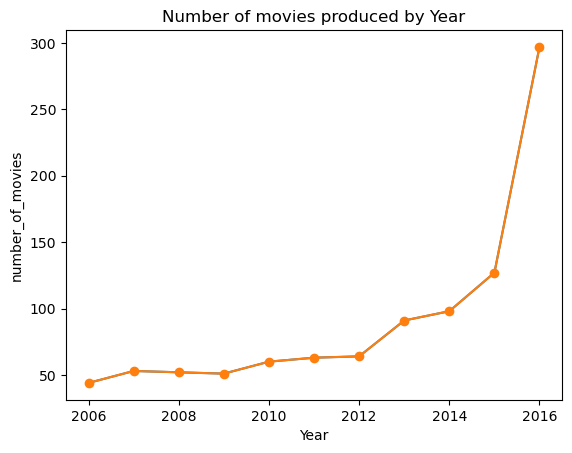

In [32]:
x = count_of_movie_by_year['Year']
y = count_of_movie_by_year['number_of_movies']


sns.lineplot(count_of_movie_by_year, x=x , y=y)
plt.title('Number of movies produced by Year')
#plt.ylabel('Number Of Movies')
plt.plot(x,y, marker = 'o', linestyle ='-')
plt.show()

Observation: The year 2016 had the highest number of movies

#### Count Of Rating Category

In [33]:
df['Rating'].unique()

array([8.1, 7. , 7.3, 7.2, 6.2, 6.1, 8.3, 6.4, 7.1, 7.5, 7.8, 7.9, 7.7,
       6.6, 8.2, 6.7, 8. , 6.5, 5.3, 6.8, 4.7, 5.9, 6.3, 5.6, 8.6, 7.6,
       6.9, 2.7, 3.7, 5.8, 9. , 7.4, 4.1, 8.5, 8.8, 5.4, 6. , 5.7, 8.4,
       5.2, 5.5, 4.8, 3.9, 4.9, 5.1, 5. , 4.3, 4.6, 4.2, 4. , 3.2, 4.5,
       1.9, 3.5, 4.4])

In [34]:
def rate(rating):
    if rating < 4:
        return 'Poor'
    elif rating > 4 and rating < 7:
        return 'Average'
    else:
        return 'Great'

In [35]:
df['rating_category'] = df['Rating'].apply(rate)

In [36]:
ratings_category = df.groupby(df['rating_category']).aggregate(count_of_ratings = ('rating_category', 'count')).reset_index()


In [37]:
ratings_category

,rating_category,count_of_ratings
0,Average,543
1,Great,446
2,Poor,11


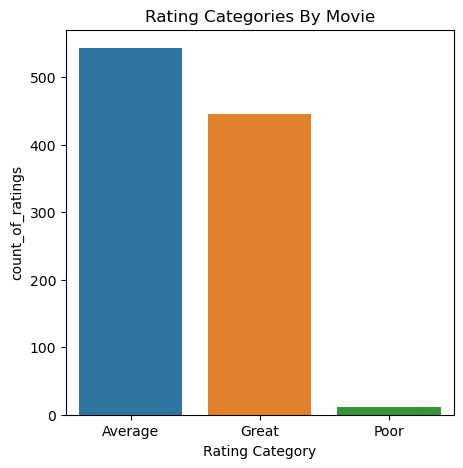

In [38]:
x = ratings_category['rating_category']
y= ratings_category['count_of_ratings']

plt.figure(figsize=(5,5))


sns.barplot(ratings_category, x = x, y =y)
title_font = {
    'family': 'serif',   # Font family (e.g., 'serif', 'sans-serif', 'monospace')
    'color': 'blue',     # Font color
    'weight': 'bold',    # Font weight (e.g., 'normal', 'bold', 'light')
    'size': 16,          # Font size
}
plt.xlabel('Rating Category')
#plt.ylabel('Number Of Movies')
plt.title('Rating Categories By Movie')
plt.show()

###### Plotting rating by category in a PieChart

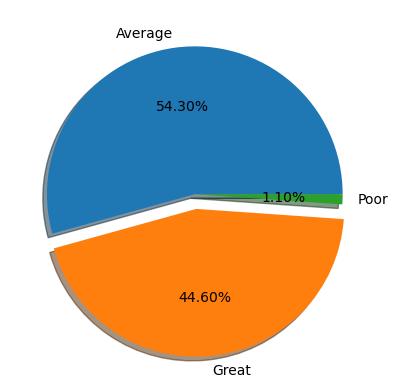

In [57]:
plt.pie(ratings_category['count_of_ratings'], labels =  ratings_category['rating_category'], autopct= '%1.2f%%', explode = (0,0.1,0), shadow = True)
plt.show()

Observation: 54.3% of movies were rated, while 44.6% of movies were rated Great, only 1.1% of movies were rated poor

### Top 10 movie by genre

In [40]:
top_10_count_by_genre = df.groupby(df['Genre']).aggregate(count_by_genre = ('Genre', 'count')).reset_index()

In [41]:
sorted_count = top_10_count_by_genre.sort_values(by = 'count_by_genre', ascending = False).iloc[0:10]

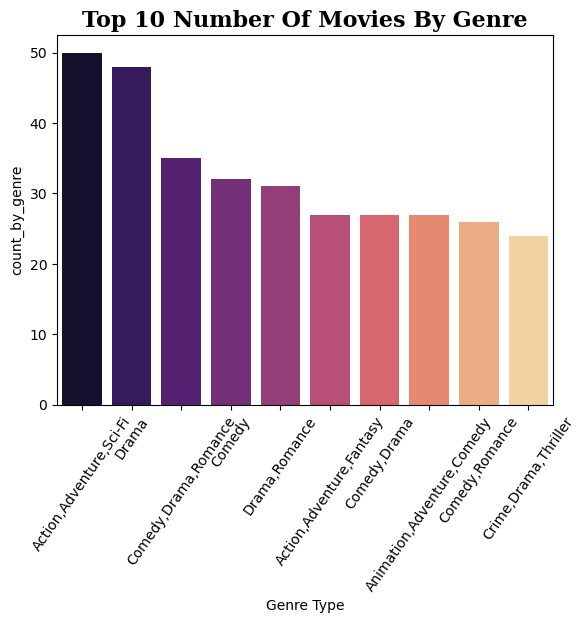

<Figure size 2500x500 with 0 Axes>

In [60]:
x = sorted_count['Genre']
y = sorted_count['count_by_genre']

sns.barplot(top_10_count_by_genre, x =x, y = y, palette= 'magma')
plt.xlabel('Genre Type')
#plt.ylabel('Number Of Movies')


plt.xticks(rotation = 55)
title_font = {
    'family': 'serif',   
    'color': 'black',     
    'weight': 'bold',    
    'size': 16,          
}
plt.title('Top 10 Number Of Movies By Genre', fontdict = title_font)
plt.figure(figsize = (25,5))
plt.show()

Observation: The genre Action,Adventure,Sci-Fi has the highest number of movies on the website

### What is the total revenue generated?

In [43]:
np.round(df['Revenue'].sum(),2)

82956376128.0

### What is the total revenue generated by Genres?

In [44]:
total_revenue_by_genre = df.groupby(df['Genre']).agg(genre_revenue = ('Revenue','sum')).reset_index()

In [45]:
sorted_values = total_revenue_by_genre.sort_values(by = 'genre_revenue', ascending = False).iloc[0:10]

In [46]:
sorted_values

,Genre,genre_revenue
11,"Action,Adventure,Sci-Fi",1.046151e+10
89,"Animation,Adventure,Comedy",5.837706e+09
7,"Action,Adventure,Fantasy",5.331246e+09
108,Comedy,2.439548e+09
149,Drama,2.264198e+09
80,"Adventure,Family,Fantasy",2.201470e+09
87,"Animation,Action,Adventure",1.759260e+09
12,"Action,Adventure,Thriller",1.739360e+09
118,"Comedy,Drama,Romance",1.496533e+09
134,"Comedy,Romance",1.467979e+09


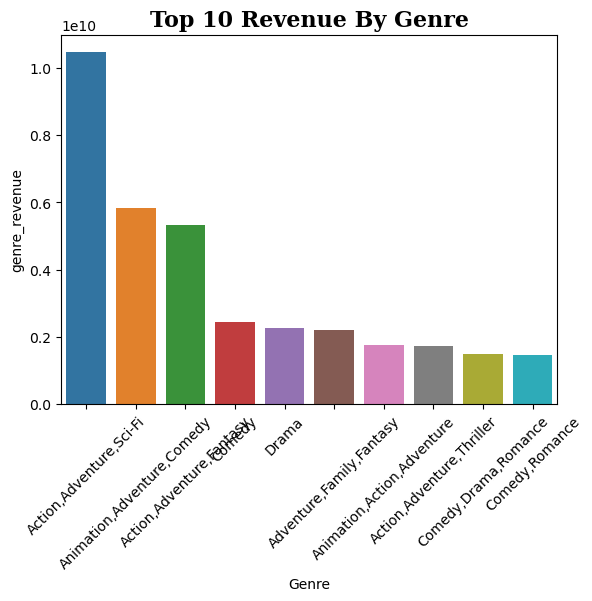

In [47]:
#Visualization
x = sorted_values['Genre']
y= sorted_values['genre_revenue']

sns.barplot(total_revenue_by_genre, x=x, y=y)
plt.xticks(rotation = 45)
title_font = {
    'family': 'serif',   
    'color': 'Black',     
    'weight': 'bold',    
    'size': 16, }
plt.title('Top 10 Revenue By Genre', fontdict = title_font)
plt.show()

Observation: The genre Action,Adventure,Sci-Fi generated the highest revenue while comedy, romance generated the least revenue

### What is the top 5 voted movies?What is the top 5 most rated movies?

In [48]:
top_5_voted_movies = df.sort_values(by=['Votes'], ascending = False).iloc[0:5]

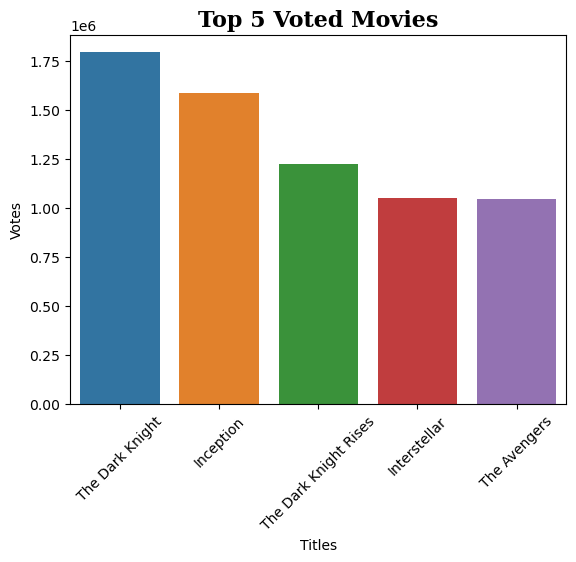

In [49]:
x = top_5_voted_movies['Title']
y =top_5_voted_movies['Votes']

sns.barplot(top_5_voted_movies, x=x, y=y)
plt.xticks(rotation = 45)
title_font = {
    'family': 'serif',   
    'color': 'black',     
    'weight': 'bold',    
    'size': 16,          
}
plt.title('Top 5 Voted Movies', fontdict = title_font)
plt.xlabel('Titles')

plt.show()

Observation: The movie The Dark Knight had the highest number of votes on the website

### Find 5 most rated movies

In [50]:
top_5_rated_movies = df.sort_values(by = ['Rating'], ascending = False).iloc[0:5]

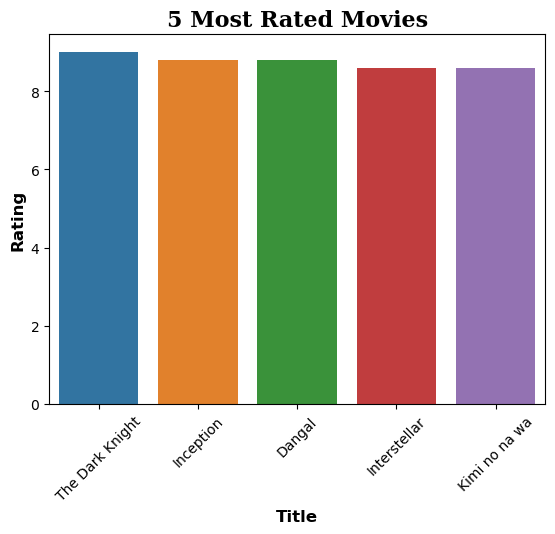

In [51]:
x = top_5_rated_movies['Title']
y= top_5_rated_movies['Rating']

sns.barplot(top_5_rated_movies, x=x,y=y)

ylabel_font = {
    'family': 'sans-serif',  
    'color': 'black',        
    'weight': 'bold',      
    'size': 12,              
}
xlabel_font = {
    'family': 'sans-serif',  
    'color': 'black',        
    'weight': 'bold',      
    'size': 12,              
}
plt.gca().set_ylabel('Rating', fontdict=ylabel_font)
plt.gca().set_xlabel('Title', fontdict=xlabel_font)

title_font = {
    'family': 'serif',   
    'color': 'black',     
    'weight': 'bold',    
    'size': 16,          
}
plt.title('5 Most Rated Movies', fontdict = title_font)
plt.xticks(rotation = 45)
plt.show()

Observation: The highest rated movie was The Dark Knight

### The Least Profitable Movies

In [68]:
low_5_rated_movies = df.sort_values(by = ['Rating'])[0:5]

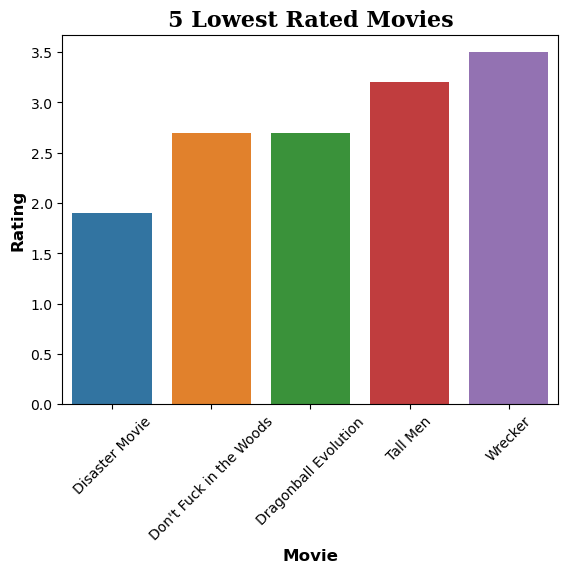

In [72]:
x = low_5_rated_movies['Title']
y=low_5_rated_movies['Rating']

sns.barplot(low_5_rated_movies, x=x,y=y)

ylabel_font = {
    'family': 'sans-serif',  
    'color': 'black',        
    'weight': 'bold',      
    'size': 12,              
}
xlabel_font = {
    'family': 'sans-serif',  
    'color': 'black',        
    'weight': 'bold',      
    'size': 12,              
}
plt.gca().set_ylabel('Rating', fontdict=ylabel_font)
plt.gca().set_xlabel('Movie', fontdict=xlabel_font)

title_font = {
    'family': 'serif',   
    'color': 'black',     
    'weight': 'bold',    
    'size': 16,          
}
plt.title('5 Lowest Rated Movies',  fontdict = title_font)
plt.xticks(rotation = 45)
plt.show()

Observation: The lowest rated movie on the website The Disaster Movie [quite ironic]

### Find the top 5 profitable movies

In [52]:
top_5_profitable_movies = df.sort_values(by=['Revenue'], ascending = False).iloc[0:5]

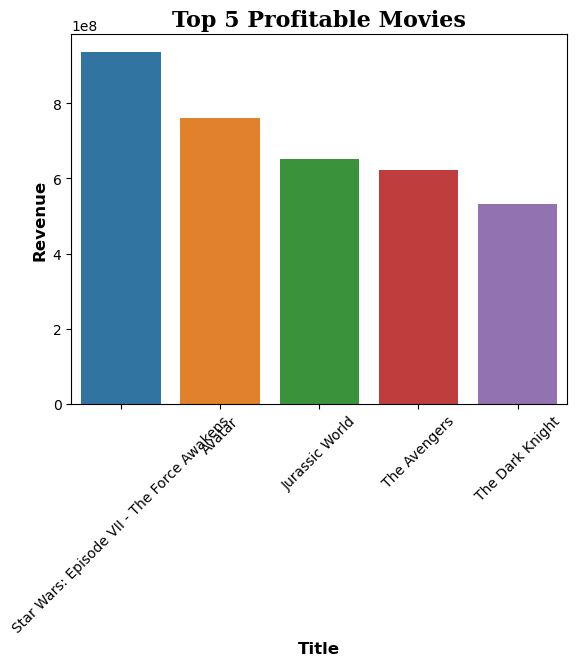

In [53]:
x = top_5_profitable_movies['Title']
y = top_5_profitable_movies['Revenue']

ylabel_font = {
    'family': 'sans-serif',  
    'color': 'black',        
    'weight': 'bold',      
    'size': 12,              
}
xlabel_font = {
    'family': 'sans-serif',  
    'color': 'black',        
    'weight': 'bold',      
    'size': 12,              
}
plt.gca().set_ylabel('Y-axis', fontdict=ylabel_font)
plt.gca().set_xlabel('X-axis', fontdict=xlabel_font)

title_font = {
    'family': 'serif',   
    'color': 'black',     
    'weight': 'bold',    
    'size': 16,          
}

plt.title('Top 5 Profitable Movies', fontdict=title_font)
plt.xticks(rotation = 45)

sns.barplot(top_5_profitable_movies, x=x, y=y)
plt.show()

Observation: The Most Profitable movie is Star Wars Episode VII - The Force Awakens